# SUBMITTED BY: R MEGHA

## TASK #3 - TO EXPLORE UNSUPERVISED MACHINE LEARNING

#### Task Description:

#### . From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
#### . Use R or Python to perform this task.

## Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans



## Exploring the given dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()  # To see first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape  # This means that our dataset has 150 rows and 4 columns

(150, 4)

In [4]:
iris_df.describe()   # To see statistical details of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Define target and predictors.

In [6]:
X = iris.data[:, :2]
y = iris.target

## Data Visualization

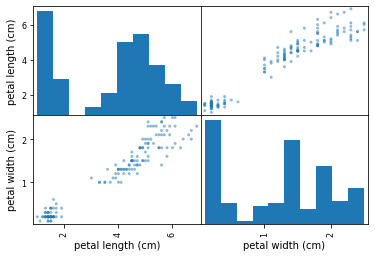

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:,[2,3]])
plt.show()

From this graph we can roughly see that the number of clusters could be 3. 

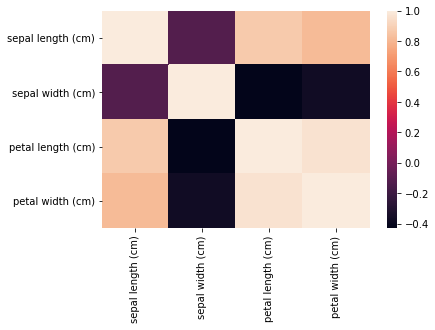

In [8]:
sns.heatmap(iris_df.corr())

#### Scatter Plot
A Scatter plot (or) scatter chart (or) scatter graph uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Text(0, 0.5, 'Sepal Width')

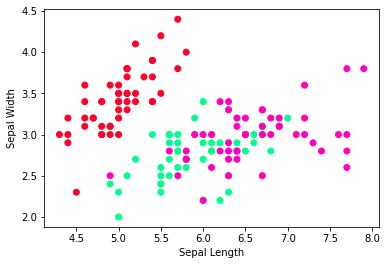

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Finding the optimal number of clusters

 To determine the value of K i.e the optimal number of clusters for the K-Means classification algorithm we can use Elbow Method.

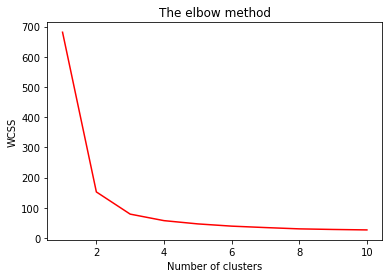

In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0,1,2,3]].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph,
# allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss , color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


You can clearly see that why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.
From this we choose the number of clusters as 3.

## Applying kmeans to the dataset / creating the kmeans classifier

After finding the optimal number of clusters i.e, the value of K , we can use it in the K-Means Classifier Algorithm

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# Fitting and predicting the data.
y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters

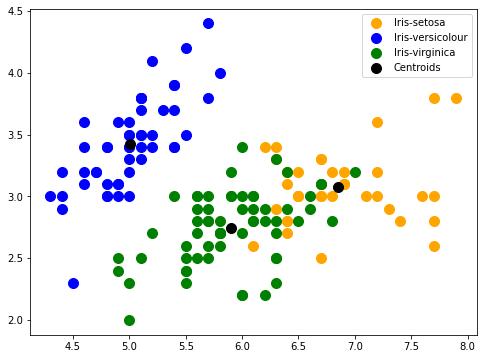

In [12]:
# Visualizing the clusters - on the first two columns.
f,ax = plt.subplots(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

# Completed!